In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline 

In [2]:
df=pd.read_csv('/home/abraham/ML-ITAM/ML-Abraham/clase-ML2017/EjercicioROC.csv')
df.head()

,Calificacion,Categoria Real
0,0.003530,0
1,0.003501,0
2,0.047738,0
3,0.003874,0
4,0.004077,0


In [3]:
df=df.sort_values('Calificacion',ascending=False)
df.head(10)

,Calificacion,Categoria Real
4292,0.431818,0
39,0.431818,0
4787,0.431818,0
4539,0.431818,0
2638,0.426254,1
2238,0.426254,0
9398,0.426254,0
4908,0.426254,1
1232,0.426254,1
4897,0.426254,1


In [4]:
def acum(base,var):
    cum=np.zeros(len(base))
    for i in range(len(base)):
        if i==0:
            cum[i]=base[var].iloc[i]
        else:
            cum[i]=cum[i-1]+base[var].iloc[i]
    return(cum)

In [5]:
from sklearn.metrics import roc_curve, auc
def plot_roc(score,target,buckets):
    
    data=pd.DataFrame(np.array(score),columns=['score'])
    data['target']=np.array(target)
    
    data['no_target'] = 1 - data.target
    # particiones

    #data['bucket'] = pd.qcut(data.score, buckets)

    # GROUP THE DATA FRAME BY BUCKETS

    #grouped = data.groupby('bucket', as_index = False)

    # CREATE A SUMMARY DATA FRAME

    #agg1 = grouped.min().score 

    #agg1 = pd.DataFrame(grouped.min().score) 
    #agg1.rename(columns={'score': 'min_scr'},inplace=True)
                                                    
    #agg1['max_scr'] = grouped.max().score

    #agg1['target'] = grouped.sum().target

    #agg1['no_target'] = grouped.sum().no_target

    data['total'] = data.target + data.no_target


    # SORT THE DATA FRAME BY SCORE

    agg2 = (data.sort_values(by = 'score',ascending=False)).reset_index(drop = True)

    agg2['FPR'] = (agg2.no_target / agg2.target)

    agg2['event_rate'] = (agg2.target / agg2.total).apply('{0:.2%}'.format)

    # CALCULATE KS STATISTIC

    agg2['ks'] = np.round(((agg2.target / data.target.sum()).cumsum() - (agg2.no_target / data.no_target.sum()).cumsum()), 4) * 100

    # DEFINE A FUNCTION TO FLAG MAX KS

    flag = lambda x: '<----' if x == agg2.ks.max() else ''

    # FLAG OUT MAX KS

    agg2['max_ks'] = agg2.ks.apply(flag)


    orig=float(agg2['target'].sum()/agg2['total'].sum()) 



    agg2['cumtotal']=acum(agg2,'total')
    agg2['cum_target']=acum(agg2,'target')
    agg2['cum_no_target']=acum(agg2,'no_target') 
    agg2['cum_FPR'] = (agg2.cum_no_target / agg2.cum_target).apply('{0:.2f}'.format) 
    agg2['cum_event_rate'] = (agg2.cum_target / agg2.cumtotal).apply('{0:.2%}'.format) 
    agg2['cum_TP'] = (agg2.cum_target / agg2['target'].sum()).apply('{0:.2%}'.format) 
    agg2['cum_FP'] = (agg2.cum_no_target / agg2['no_target'].sum()).apply('{0:.2%}'.format) 
    agg2['%Universo'] = (agg2.cumtotal / agg2.cumtotal.max()).apply('{0:.2%}'.format)
    agg2['LIFT'] = ((agg2.cum_target / agg2.cumtotal)/orig)

    agg2['Recall'] = (agg2.cum_target / agg2['target'].sum())
    agg2['FPrate'] = (agg2.cum_no_target / agg2['no_target'].sum()) 
    agg2['%Ctes'] = (agg2.cumtotal / agg2.cumtotal.max()) 
    
    AUC=auc(agg2['FPrate'],agg2['Recall'])
    # Plot of a ROC curve for a specific class
    plt.figure()
    l1=plt.plot(agg2['FPrate'],agg2['Recall'], label='ROC  (area = %0.2f)' % AUC,linewidth=5,color='blue') 

    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Curva ROC del modelo ',fontsize=18)
    plt.legend(loc="lower right")
    plt.show()
    

    pass      

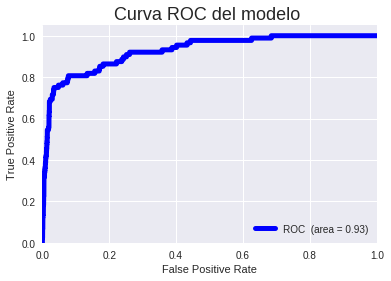

In [6]:
plot_roc(df['Calificacion'],df['Categoria Real'],4)

#pd.DataFrame(np.array(df['Calificacion']),columns=['score'])

/home/abraham/anaconda3/lib/python3.6/site-packages/sklearn/metrics/ranking.py:547: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


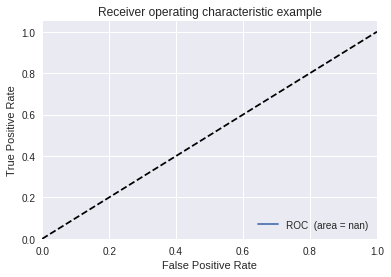

In [7]:
from sklearn.metrics import roc_auc_score, auc,precision_recall_curve
fpr, tpr, thresholds=roc_curve(np.array(df['Calificacion']),np.array(df['Categoria Real']),pos_label=1)
f_auc=auc(fpr,tpr) 
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC  (area = %0.2f)' % f_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [8]:
fpr

array([ 0.        ,  0.00869909,  1.        ])

In [9]:
def plot_prec_rec(score,target,buckets):
    
    data=pd.DataFrame(np.array(score),columns=['score'])
    data['target']=np.array(target)
    
    data['no_target'] = 1 - data.target
    # particiones

    #data['bucket'] = pd.qcut(data.score, buckets)

    # GROUP THE DATA FRAME BY BUCKETS

    #grouped = data.groupby('bucket', as_index = False)

    # CREATE A SUMMARY DATA FRAME

    #agg1 = grouped.min().score 

    #agg1 = pd.DataFrame(grouped.min().score) 
    #agg1.rename(columns={'score': 'min_scr'},inplace=True)
                                                    
    #agg1['max_scr'] = grouped.max().score

    #agg1['target'] = grouped.sum().target

    #agg1['no_target'] = grouped.sum().no_target

    data['total'] = data.target + data.no_target


    # SORT THE DATA FRAME BY SCORE

    agg2 = (data.sort_values(by = 'score',ascending=False)).reset_index(drop = True)

    agg2['FPR'] = (agg2.no_target / agg2.target)

    agg2['event_rate'] = (agg2.target / agg2.total).apply('{0:.2%}'.format)

    # CALCULATE KS STATISTIC

    agg2['ks'] = np.round(((agg2.target / data.target.sum()).cumsum() - (agg2.no_target / data.no_target.sum()).cumsum()), 4) * 100

    # DEFINE A FUNCTION TO FLAG MAX KS

    flag = lambda x: '<----' if x == agg2.ks.max() else ''

    # FLAG OUT MAX KS

    agg2['max_ks'] = agg2.ks.apply(flag)


    orig=float(agg2['target'].sum()/agg2['total'].sum()) 



    agg2['cumtotal']=acum(agg2,'total')
    agg2['cum_target']=acum(agg2,'target')
    agg2['cum_no_target']=acum(agg2,'no_target') 
    agg2['cum_FPR'] = (agg2.cum_no_target / agg2.cum_target).apply('{0:.2f}'.format) 
    agg2['cum_event_rate'] = (agg2.cum_target / agg2.cumtotal).apply('{0:.2%}'.format) 
    agg2['cum_TP'] = (agg2.cum_target / agg2['target'].sum()).apply('{0:.2%}'.format) 
    agg2['cum_FP'] = (agg2.cum_no_target / agg2['no_target'].sum()).apply('{0:.2%}'.format) 
    agg2['%Universo'] = (agg2.cumtotal / agg2.cumtotal.max()).apply('{0:.2%}'.format)
    agg2['LIFT'] = ((agg2.cum_target / agg2.cumtotal)/orig)

    agg2['Recall'] = (agg2.cum_target / agg2['target'].sum())
    agg2['Precision'] = (agg2.cum_target / agg2.cumtotal)
    agg2['FPrate'] = (agg2.cum_no_target / agg2['no_target'].sum()) 
    agg2['%Ctes'] = (agg2.cumtotal / agg2.cumtotal.max()) 
    
    #AUC=auc(agg2['FPrate'],agg2['Recall'])
    # Plot of a ROC curve for a specific class
    plt.figure()
    l1=plt.plot(agg2['Precision'],agg2['Recall'],linewidth=5,color='blue') 

    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('Precision')
    plt.ylabel('Recall')
    plt.title('Precision vs.Recall ',fontsize=18)
    plt.legend(loc="lower right")
    plt.show()
    

    pass    

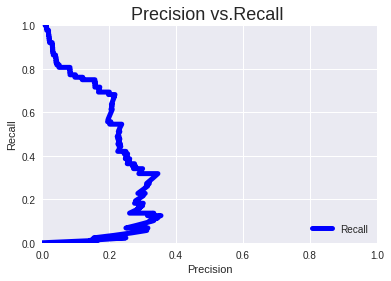

In [10]:
plot_prec_rec(df['Calificacion'],df['Categoria Real'],4)

In [23]:
def plot_double_density(score,target,buckets):
    
    data=pd.DataFrame(np.array(score),columns=['score'])
    data['target']=np.array(target)
    
    data['no_target'] = 1 - data.target
    # particiones

    #data['bucket'] = pd.qcut(data.score, buckets)

    # GROUP THE DATA FRAME BY BUCKETS

    #grouped = data.groupby('bucket', as_index = False)

    # CREATE A SUMMARY DATA FRAME

    #agg1 = grouped.min().score 

    #agg1 = pd.DataFrame(grouped.min().score) 
    #agg1.rename(columns={'score': 'min_scr'},inplace=True)
                                                    
    #agg1['max_scr'] = grouped.max().score

    #agg1['target'] = grouped.sum().target

    #agg1['no_target'] = grouped.sum().no_target

    data['total'] = data.target + data.no_target


    # SORT THE DATA FRAME BY SCORE

    agg2 = (data.sort_values(by = 'score',ascending=False)).reset_index(drop = True)

    agg2['FPR'] = (agg2.no_target / agg2.target)

    agg2['event_rate'] = (agg2.target / agg2.total).apply('{0:.2%}'.format)

    # CALCULATE KS STATISTIC

    agg2['ks'] = np.round(((agg2.target / data.target.sum()).cumsum() - (agg2.no_target / data.no_target.sum()).cumsum()), 4) * 100

    # DEFINE A FUNCTION TO FLAG MAX KS

    flag = lambda x: '<----' if x == agg2.ks.max() else ''

    # FLAG OUT MAX KS

    agg2['max_ks'] = agg2.ks.apply(flag)


    orig=float(agg2['target'].sum()/agg2['total'].sum()) 



    agg2['cumtotal']=acum(agg2,'total')
    agg2['cum_target']=acum(agg2,'target')
    agg2['cum_no_target']=acum(agg2,'no_target') 
    agg2['cum_FPR'] = (agg2.cum_no_target / agg2.cum_target).apply('{0:.2f}'.format) 
    agg2['cum_event_rate'] = (agg2.cum_target / agg2.cumtotal).apply('{0:.2%}'.format) 
    agg2['cum_TP'] = (agg2.cum_target / agg2['target'].sum()).apply('{0:.2%}'.format) 
    agg2['cum_FP'] = (agg2.cum_no_target / agg2['no_target'].sum()).apply('{0:.2%}'.format) 
    agg2['%Universo'] = (agg2.cumtotal / agg2.cumtotal.max()).apply('{0:.2%}'.format)
    agg2['LIFT'] = ((agg2.cum_target / agg2.cumtotal)/orig)

    agg2['Recall'] = (agg2.cum_target / agg2['target'].sum())
    agg2['Precision'] = (agg2.cum_target / agg2.cumtotal)
    agg2['FPrate'] = (agg2.cum_no_target / agg2['no_target'].sum()) 
    agg2['%Ctes'] = (agg2.cumtotal / agg2.cumtotal.max()) 
    
    plt.figure(figsize=(10,6))
    data[data['target']==1]['score'].plot.kde(label='target=1',xlim=[0,1])
    #df2['a'].plot.kde()
    data[data['target']==0]['score'].plot.kde(label='target=0',xlim=[0,1])
    plt.legend()
    plt.xlabel('Score')


    pass    

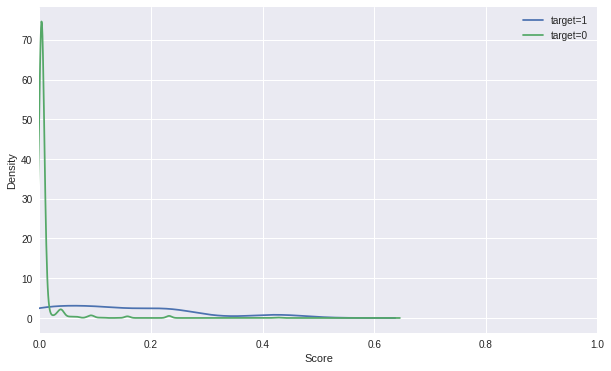

In [24]:
plot_double_density(df['Calificacion'],df['Categoria Real'],4)

In [124]:
titanic=pd.read_csv('titanic_train.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [126]:
list(titanic)

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [127]:
titanic=titanic[[
 'Pclass',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'Cabin',
 'Embarked', 'Survived']]
titanic.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Survived
0,3,male,22.0,1,0,7.2500,NaN,S,0
1,1,female,38.0,1,0,71.2833,C85,C,1
2,3,female,26.0,0,0,7.9250,NaN,S,1
3,1,female,35.0,1,0,53.1000,C123,S,1
4,3,male,35.0,0,0,8.0500,NaN,S,0


In [165]:
features=[
 'Pclass',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'Cabin',
 'Embarked']
X=np.array(titanic[features])
y=np.array(titanic['Survived'])
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [169]:
X_train[0:5][:,0]

array([3, 2, 2, 3, 3], dtype=object)

In [163]:
from sklearn.cross_validation import train_test_split 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(binar(X_train))
#pipe.fit(X_train)
#pipe.score(X_test, y_test)

TypeError: Last step of Pipeline should implement fit. '     Pclass   Age  SibSp  Parch      Fare  Sex_female  Sex_male  Cabin_A10  \
140       3   NaN      0      2   15.2458           1         0          0   
439       2  31.0      0      0   10.5000           0         1          0   
817       2  31.0      1      1   37.0042           0         1          0   
378       3  20.0      0      0    4.0125           0         1          0   
491       3  21.0      0      0    7.2500           0         1          0   
331       1  45.5      0      0   28.5000           0         1          0   
588       3  22.0      0      0    8.0500           0         1          0   
358       3   NaN      0      0    7.8792           1         0          0   
674       2   NaN      0      0    0.0000           0         1          0   
162       3  26.0      0      0    7.7750           0         1          0   
580       2  25.0      1      1   30.0000           1         0          0   
402       3  21.0      1      0    9.8250           1         0          0   
671       1  31.0      1      0   52.0000           0         1          0   
875       3  15.0      0      0    7.2250           1         0          0   
727       3   NaN      0      0    7.7375           1         0          0   
428       3   NaN      0      0    7.7500           0         1          0   
54        1  65.0      0      1   61.9792           0         1          0   
45        3   NaN      0      0    8.0500           0         1          0   
172       3   1.0      1      1   11.1333           1         0          0   
447       1  34.0      0      0   26.5500           0         1          0   
597       3  49.0      0      0    0.0000           0         1          0   
204       3  18.0      0      0    8.0500           0         1          0   
240       3   NaN      1      0   14.4542           1         0          0   
672       2  70.0      0      0   10.5000           0         1          0   
39        3  14.0      1      0   11.2417           1         0          0   
283       3  19.0      0      0    8.0500           0         1          0   
308       2  30.0      1      0   24.0000           0         1          0   
18        3  31.0      1      0   18.0000           1         0          0   
769       3  32.0      0      0    8.3625           0         1          0   
156       3  16.0      0      0    7.7333           1         0          0   
..      ...   ...    ...    ...       ...         ...       ...        ...   
72        2  21.0      0      0   73.5000           0         1          0   
845       3  42.0      0      0    7.5500           0         1          0   
537       1  30.0      0      0  106.4250           1         0          0   
677       3  18.0      0      0    9.8417           1         0          0   
849       1   NaN      1      0   89.1042           1         0          0   
874       2  28.0      1      0   24.0000           1         0          0   
174       1  56.0      0      0   30.6958           0         1          0   
87        3   NaN      0      0    8.0500           0         1          0   
551       2  27.0      0      0   26.0000           0         1          0   
486       1  35.0      1      0   90.0000           1         0          0   
705       2  39.0      0      0   26.0000           0         1          0   
314       2  43.0      1      1   26.2500           0         1          0   
396       3  31.0      0      0    7.8542           1         0          0   
600       2  24.0      2      1   27.0000           1         0          0   
472       2  33.0      1      2   27.7500           1         0          0   
70        2  32.0      0      0   10.5000           0         1          0   
599       1  49.0      1      0   56.9292           0         1          0   
804       3  27.0      0      0    6.9750           0         1          0   
754       2  48.0      1      2   65.0000           1         0          0   
277       2   NaN      0      0    0.0000           0         1          0   
723       2  50.0      0      0   13.0000           0         1          0   
9         2  14.0      1      0   30.0708           1         0          0   
359       3   NaN      0      0    7.8792           1         0          0   
707       1  42.0      0      0   26.2875           0         1          0   
763       1  36.0      1      2  120.0000           1         0          0   
835       1  39.0      1      1   83.1583           1         0          0   
192       3  19.0      1      0    7.8542           1         0          0   
629       3   NaN      0      0    7.7333           0         1          0   
559       3  36.0      1      0   17.4000           1         0          0   
684       2  60.0      1      1   39.0000           0         1          0   

     Cabin_A14  Cabin_A16     ...      Cabin_F G63  Cabin_F2  Cabin_F33  \
140          0          0     ...                0         0          0   
439          0          0     ...                0         0          0   
817          0          0     ...                0         0          0   
378          0          0     ...                0         0          0   
491          0          0     ...                0         0          0   
331          0          0     ...                0         0          0   
588          0          0     ...                0         0          0   
358          0          0     ...                0         0          0   
674          0          0     ...                0         0          0   
162          0          0     ...                0         0          0   
580          0          0     ...                0         0          0   
402          0          0     ...                0         0          0   
671          0          0     ...                0         0          0   
875          0          0     ...                0         0          0   
727          0          0     ...                0         0          0   
428          0          0     ...                0         0          0   
54           0          0     ...                0         0          0   
45           0          0     ...                0         0          0   
172          0          0     ...                0         0          0   
447          0          0     ...                0         0          0   
597          0          0     ...                0         0          0   
204          0          0     ...                0         0          0   
240          0          0     ...                0         0          0   
672          0          0     ...                0         0          0   
39           0          0     ...                0         0          0   
283          0          0     ...                0         0          0   
308          0          0     ...                0         0          0   
18           0          0     ...                0         0          0   
769          0          0     ...                0         0          0   
156          0          0     ...                0         0          0   
..         ...        ...     ...              ...       ...        ...   
72           0          0     ...                0         0          0   
845          0          0     ...                0         0          0   
537          0          0     ...                0         0          0   
677          0          0     ...                0         0          0   
849          0          0     ...                0         0          0   
874          0          0     ...                0         0          0   
174          0          0     ...                0         0          0   
87           0          0     ...                0         0          0   
551          0          0     ...                0         0          0   
486          0          0     ...                0         0          0   
705          0          0     ...                0         0          0   
314          0          0     ...                0         0          0   
396          0          0     ...                0         0          0   
600          0          0     ...                0         0          0   
472          0          0     ...                0         0          0   
70           0          0     ...                0         0          0   
599          0          0     ...                0         0          0   
804          0          0     ...                0         0          0   
754          0          0     ...                0         0          0   
277          0          0     ...                0         0          0   
723          0          0     ...                0         0          0   
9            0          0     ...                0         0          0   
359          0          0     ...                0         0          0   
707          0          0     ...                0         0          0   
763          0          0     ...                0         0          0   
835          0          0     ...                0         0          0   
192          0          0     ...                0         0          0   
629          0          0     ...                0         0          0   
559          0          0     ...                0         0          0   
684          0          0     ...                0         0          0   

     Cabin_F38  Cabin_F4  Cabin_G6  Cabin_T  Embarked_C  Embarked_Q  \
140          0         0         0        0           1           0   
439          0         0         0        0           0           0   
817          0         0         0        0           1           0   
378          0         0         0        0           1           0   
491          0         0         0        0           0           0   
331          0         0         0        0           0           0   
588          0         0         0        0           0           0   
358          0         0         0        0           0           1   
674          0         0         0        0           0           0   
162          0         0         0        0           0           0   
580          0         0         0        0           0           0   
402          0         0         0        0           0           0   
671          0         0         0        0           0           0   
875          0         0         0        0           1           0   
727          0         0         0        0           0           1   
428          0         0         0        0           0           1   
54           0         0         0        0           1           0   
45           0         0         0        0           0           0   
172          0         0         0        0           0           0   
447          0         0         0        0           0           0   
597          0         0         0        0           0           0   
204          0         0         0        0           0           0   
240          0         0         0        0           1           0   
672          0         0         0        0           0           0   
39           0         0         0        0           1           0   
283          0         0         0        0           0           0   
308          0         0         0        0           1           0   
18           0         0         0        0           0           0   
769          0         0         0        0           0           0   
156          0         0         0        0           0           1   
..         ...       ...       ...      ...         ...         ...   
72           0         0         0        0           0           0   
845          0         0         0        0           0           0   
537          0         0         0        0           1           0   
677          0         0         0        0           0           0   
849          0         0         0        0           1           0   
874          0         0         0        0           1           0   
174          0         0         0        0           1           0   
87           0         0         0        0           0           0   
551          0         0         0        0           0           0   
486          0         0         0        0           0           0   
705          0         0         0        0           0           0   
314          0         0         0        0           0           0   
396          0         0         0        0           0           0   
600          0         0         0        0           0           0   
472          0         0         0        0           0           0   
70           0         0         0        0           0           0   
599          0         0         0        0           1           0   
804          0         0         0        0           0           0   
754          0         0         0        0           0           0   
277          0         0         0        0           0           0   
723          0         0         0        0           0           0   
9            0         0         0        0           1           0   
359          0         0         0        0           0           1   
707          0         0         0        0           0           0   
763          0         0         0        0           0           0   
835          0         0         0        0           1           0   
192          0         0         0        0           0           0   
629          0         0         0        0           0           1   
559          0         0         0        0           0           0   
684          0         0         0        0           0           0   

     Embarked_S  
140           0  
439           1  
817           0  
378           0  
491           1  
331           1  
588           1  
358           0  
674           1  
162           1  
580           1  
402           1  
671           1  
875           0  
727           0  
428           0  
54            0  
45            1  
172           1  
447           1  
597           1  
204           1  
240           0  
672           1  
39            0  
283           1  
308           0  
18            1  
769           1  
156           0  
..          ...  
72            1  
845           1  
537           0  
677           1  
849           0  
874           0  
174           0  
87            1  
551           1  
486           1  
705           1  
314           1  
396           1  
600           1  
472           1  
70            1  
599           0  
804           1  
754           1  
277           1  
723           1  
9             0  
359           0  
707           1  
763           1  
835           0  
192           1  
629           0  
559           1  
684           1  

[712 rows x 137 columns]' (type <class 'pandas.core.frame.DataFrame'>) doesn't

In [157]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
def binar(x):
    cat=x.select_dtypes(['object']) 
    nom=list(cat)
    for nm in nom:
        x=pd.concat([x,pd.get_dummies(x[nm], prefix=nm).astype("int64")],axis=1)
        del x[nm]    
    return(x)    
binar(X_train)    

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Cabin_A10,Cabin_A14,Cabin_A16,...,Cabin_F G63,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_C,Embarked_Q,Embarked_S
140,3,NaN,0,2,15.2458,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
439,2,31.0,0,0,10.5000,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
817,2,31.0,1,1,37.0042,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
378,3,20.0,0,0,4.0125,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
491,3,21.0,0,0,7.2500,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
331,1,45.5,0,0,28.5000,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
588,3,22.0,0,0,8.0500,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
358,3,NaN,0,0,7.8792,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
674,2,NaN,0,0,0.0000,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
162,3,26.0,0,0,7.7750,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [148]:


cat=X_train.select_dtypes(['object'])
nom=list(cat)

label_encoder = LabelEncoder()  ## Para convertir a enteros
one_hot_encoder = OneHotEncoder()

## Convertirmos a enteros, i.e. setosa -> 0, etc
species = label_encoder.fit_transform(X_train[nom[0]])

## Ya no se le pueden pasar vectores (arreglos 1D) a los preprocesadores
species = species[:, np.newaxis]

## Debemos invocar todense() ya que OneHotEncoder devuelve una matriz rala
## La otra opción es OneHotEncoder(sparce=False)
species_one_hot = one_hot_encoder.fit_transform(species).todense()
print(species_one_hot[:5,:])

[[ 1.  0.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]]


In [151]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
140,3,female,NaN,0,2,15.2458,NaN,C
439,2,male,31.0,0,0,10.5000,NaN,S
817,2,male,31.0,1,1,37.0042,NaN,C
378,3,male,20.0,0,0,4.0125,NaN,C
491,3,male,21.0,0,0,7.2500,NaN,S
331,1,male,45.5,0,0,28.5000,C124,S
588,3,male,22.0,0,0,8.0500,NaN,S
358,3,female,NaN,0,0,7.8792,NaN,Q
674,2,male,NaN,0,0,0.0000,NaN,S
162,3,male,26.0,0,0,7.7750,NaN,S
